# [TEMPLATE] DATASET DEPURADO

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [3]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

<hr>

# Correlacion: Precio en funcion de Metros

- **Categoria:** `metrostotales` y `metroscubiertos`.
- **Objetivo:** Investigar la influencia que tienen los metros totales y cubiertos de la propiedad por sobre el precio.

In [4]:
# Colores a utilizar

amarillo = '#FCAA67'
rojo = '#B0413E'
verde = '#FFFFC7'
azul = '#548687'
marron = '#473335'

In [5]:
mtstot = df.copy()

In [6]:
mtstot = mtstot.loc[df['metrostotales'] != -1][['id', 'tipodepropiedad', 'metrostotales', 'precio']]

In [7]:
mtstot.head()

,id,tipodepropiedad,metrostotales,precio
0,254099,Apartamento,80,2273000
1,53461,Casa en condominio,180,3600000
2,247984,Casa,166,1200000
3,209067,Casa,67,650000
4,185997,Apartamento,95,1150000


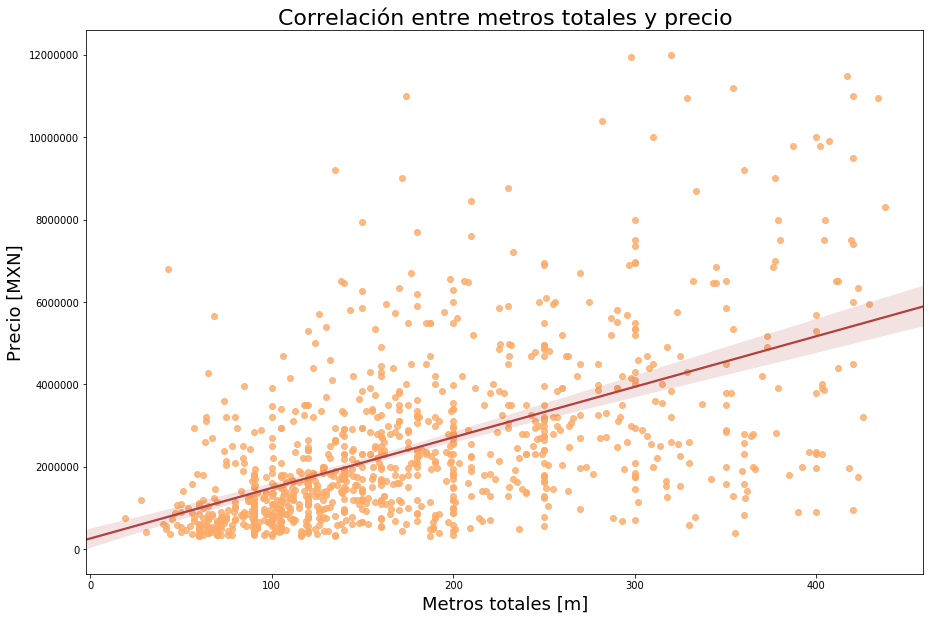

In [20]:
plt.figure(figsize=(15,10))
plt.ticklabel_format(style='plain')


g = sns.regplot(x="metrostotales", y="precio", data=mtstot.sample(n=1000),
               line_kws={'color': rojo},
               scatter_kws={'color': amarillo});
g.set_title("Correlación entre metros totales y precio", fontsize=22)
g.set_ylabel("Precio [MXN]",fontsize=18)
g.set_xlabel("Metros totales [m]", fontsize=18)



g.figure.savefig("correlacion precio y metros totales.png", transparent=True, bbox_inches='tight')
g.figure.savefig("correlacion precio y metros totales.jpg", bbox_inches='tight')